In [11]:
import pandas as pd
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
# Load vectorized data
bow_vector = pd.read_csv('E:/new/IUBH/Courses/22-nlp/data/bow_vector.csv').to_numpy()
tfidf_vector = pd.read_csv('E:/new/IUBH/Courses/22-nlp/data/tfidf_vector.csv').to_numpy()

In [7]:
# Load cleaned data
df = pd.read_csv('E:/new/IUBH/Courses/22-nlp/data/complaints_clean.csv')

In [28]:
# Define vectorizers and fit it to the cleaned text data
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(df['clean_text'])  # Fit and transform the cleaned text data
bow_vectorizer = CountVectorizer(stop_words='english')
bow_vector = bow_vectorizer.fit_transform(df['clean_text'])
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_vector)


LatentDirichletAllocation(random_state=42)

In [19]:
# Define function to extract topics using Non-negative Matrix Factorization (NMF)
def extract_topics_nmf(vector, vectorizer):
    nmf = NMF(n_components=10, random_state=42)
    nmf.fit(vector)
    feature_names = vectorizer.get_feature_names()
    for idx, topic in enumerate(nmf.components_):
        print(f'Topic #{idx}:')
        topic_indices = topic.argsort()[:-11:-1]
        topic_words = [feature_names[i] for i in topic_indices if i < len(feature_names)]
        print(topic_words)

# Define function to extract topics using Latent Dirichlet Allocation (LDA)
def extract_topics_lda(vector, vectorizer):
    lda = LatentDirichletAllocation(n_components=10, random_state=42)
    lda.fit(vector)
    feature_names = vectorizer.get_feature_names()
    for idx, topic in enumerate(lda.components_):
        print(f'Topic #{idx}:')
        topic_indices = topic.argsort()[:-11:-1]
        topic_words = [feature_names[i] for i in topic_indices if i < len(feature_names)]
        print(topic_words)


In [20]:
# Extract topics using NMF and BoW vector
extract_topics_nmf(bow_vector, bow_vectorizer)

# Extract topics using LDA and TF-IDF vector
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_vector)
extract_topics_lda(tfidf_vector, tfidf_vectorizer)

e:\new\Python38\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
e:\new\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic #0:
['xxxx', 'inquiry', 'xxxxxxxx', 'il', 'credit', 'bank', 'make', 'remove', 'authorize', 'tx']
Topic #1:
['debt', 'creditor', 'provide', 'license', 'original', 'owe', 'number', 'date', 'pay', 'state']
Topic #2:
['xxxxxxxx', 'bbva', 'transaction', 'form', 'claim', 'advise', 'complete', 'atm', 'account', 'letter']
Topic #3:
['payment', 'account', 'make', 'pay', 'tell', 'time', 'late', 'month', 'day', 'year']
Topic #4:
['account', 'report', 'credit', 'balance', 'collection', 'remove', 'dispute', 'company', 'file', 'past']
Topic #5:
['xxxx', 'xxxxxxxx', 'information', 'rushmore', 'receive', 'credit', 'report', 'track', 'loan', 'receipt']
Topic #6:
['debt', 'people', 'claim', 'time', 'information', 'credit', 'contact', 'state', 'use', 'fake']
Topic #7:
['mortgage', 'freedom', 'payment', 'bank', 'xxxx', 'payoff', 'tell', 'pay', 'statement', 'wire']
Topic #8:
['bank', 'money', 'flagstar', 'account', 'check', 'return', 'payment', 'tell', 'send', 'pay']
Topic #9:
['shellpoint', 'modific

e:\new\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


e:\new\Python38\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


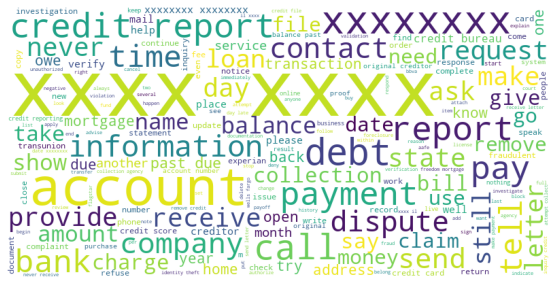

In [22]:
# Generate word cloud of the most common words in the corpus
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [29]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis_data = pyLDAvis.sklearn.prepare(lda, tfidf_vector, tfidf_vectorizer)


e:\new\Python38\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [32]:
pyLDAvis.save_html(vis_data, 'd:/lda_visualization.html')
